In [1]:
import importlib
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
from analysis_functions import *

In [3]:
importlib.reload(sys.modules['analysis_functions'])
from analysis_functions import *

In [4]:
X_stress_components_new = opener('X_stress_components_new', path_import='./resourses/')
X_strain_components_new = opener('X_strain_components_new', path_import='./resourses/')
y_stress_components_new = opener('y_stress_components_new', path_import='./resourses/')
y_strain_components_new = opener('y_strain_components_new', path_import='./resourses/')
# X_stress_components_other = opener('X_stress_components_other')
# X_strain_components_other = opener('X_strain_components_other')
# y_stress_components_other = opener('y_stress_components_other')
# y_strain_components_other = opener('y_strain_components_other')

./resourses//X_stress_components_new.pkl
./resourses//X_strain_components_new.pkl
./resourses//y_stress_components_new.pkl
./resourses//y_strain_components_new.pkl


In [5]:
X_stress_components_new.shape

(3, 2678, 5)

In [6]:
component_num = 1
n_trials = 200

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [8]:
import shutil
import numpy as np
from sklearn.metrics import mean_squared_error

def plot_results(x, y, model_name, do_zip=False, dpi=500, delete_and_rewrite=True):
    cur_X_test, cur_y_test, *_ = get_train_test(x, y)

    model = opener(model_name)
    cur_prediction = model.predict(cur_X_test)
    print('rmse = ', np.sqrt(mean_squared_error(cur_y_test, cur_prediction)))
    
    if delete_and_rewrite:
        os.makedirs(model_name, exist_ok=True)
    
    for i, item in enumerate(cur_X_test[::20]):
        fig = plt.figure(figsize=(5, 4))
        plt.plot(
            cur_X_test[i*20:(i+1)*20, -1],
            cur_prediction[i*20:(i+1)*20],
            '-o',
            label='predicted'
        )
        plt.plot(
            cur_X_test[i*20:(i+1)*20, -1],
            cur_y_test[i*20:(i+1)*20],
            '-o',
            label='real'
        )
        title = f'red {item[0]}, cal {item[1]}, alpha {int(item[2])}, fric {item[3]}'
        plt.title(title)
        plt.legend(loc='best')
        plt.xlabel('r, -')
        plt.ylabel('$\sigma$, MPa')
        # plt.show()
        plt.savefig(''.join((model_name, '/', title, '.png')), format='png', dpi=dpi)
        plt.close()
        # break
    if do_zip: shutil.make_archive(model_name, 'zip', model_name)

# KAN 

In [9]:
import importlib
import sys
from kan import KAN
KANModelTrainTest = importlib.reload(sys.modules["analysis_functions"]).KANModelTrainTest

In [10]:
kan_model:KANModelTrainTest = KANModelTrainTest() # type: ignore

In [11]:
kan_model.create_train_val_test(
    X=X_stress_components_new[component_num],
    y=y_stress_components_new[component_num],
    n_splits=1,
)


In [12]:
ds = kan_model.create_dataset(
    kan_model.train_set_X[0],
    kan_model.train_set_y[0],
    kan_model.val_set_X[0],
    kan_model.val_set_y[0],
)

print("Train data shape: {}".format(ds["train_input"].shape))
print("Train target shape: {}".format(ds["train_label"].shape))
print("Test data shape: {}".format(ds["test_input"].shape))
print("Test target shape: {}".format(ds["test_label"].shape))
print("====================================")

Train data shape: torch.Size([37480, 6])
Train target shape: torch.Size([37480, 1])
Test data shape: torch.Size([8040, 6])
Test target shape: torch.Size([8040, 1])


orig_kan = KAN([6, 3, 2, 1], seed=RANDOM_STATE)

orig_kan.fit(
    kan_model.create_dataset(
        kan_model.train_set_X[0],
        kan_model.train_set_y[0],
        kan_model.val_set_X[0],
        kan_model.val_set_y[0],
    ),
    opt="LBFGS",
    steps=5,
)

kan_model.train_model(
    width=[6, 3, 2, 1],
    opt='LBFGS',
    steps=5
)

In [14]:
# best_params = kan_model.optimize_hyperparams(
#     n_trials=200, max_n_layers=15, max_n_units=15, max_steps=1000, max_grid=6, max_k=6
# )

best_params = kan_model.optimize_hyperparams(
    n_trials=1, max_n_layers=1, max_n_units=5, max_steps=10, max_grid=6, max_k=6
)


[I 2025-03-30 22:10:30,707] A new study created in memory with name: no-name-53678011-e952-4fa5-bfb9-40d4bc3a53a6
2025-03-30 22:10:30,710 - INFO - width = [6, 4, 1]


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.23e+02 | test_loss: 1.23e+02 | reg: 6.94e+01 | : 100%|█| 4/4 [00:00<00:00,  4.80it/s
2025-03-30 22:10:31,575 - INFO - val_rmse = 122.82530975341797
[I 2025-03-30 22:10:31,576] Trial 0 finished with value: 122.82530975341797 and parameters: {'n_layers': 1, 'opt': 'Adam', 'steps': 4, 'grid': 6, 'k': 4, 'n_units_0': 4}. Best is trial 0 with value: 122.82530975341797.


saving model version 0.1


In [15]:
(kan_model.cur_X_test.shape, kan_model.train_set_X[0].shape)

((8040, 6), (37480, 6))

In [16]:
kan_model.calc_test_metric()

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                            | 0/4 [00:00<?, ?it/s]

| train_loss: 1.23e+02 | test_loss: 1.24e+02 | reg: 6.94e+01 | : 100%|█| 4/4 [00:00<00:00,  4.94it/s
2025-03-30 22:10:37,023 - INFO - test_rmse = 124.1683578491211


saving model version 0.1


array(124.16836, dtype=float32)

y_pred shape: torch.Size([8040, 1])
y_test shape: (8040, 1)


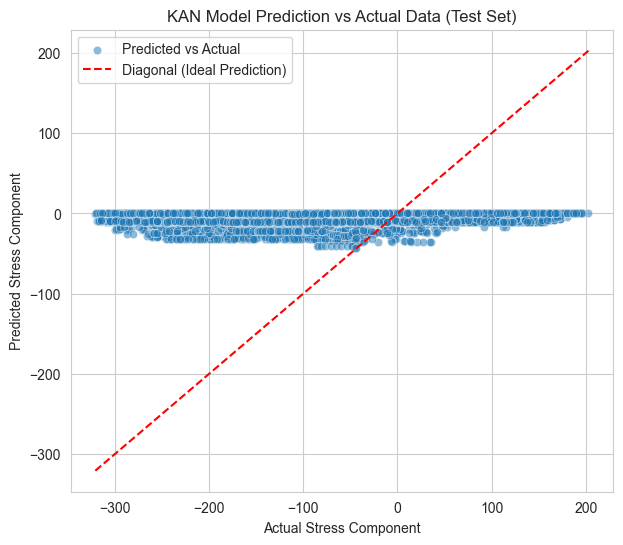

In [17]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


y_pred = kan_model.test_pred
y_test = kan_model.cur_y_test

print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)

# Plotting the results on the test set
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=y_test.flatten(), y=y_pred.detach().cpu().numpy().flatten(), alpha=0.5, label="Predicted vs Actual"
)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    label="Diagonal (Ideal Prediction)",
)
plt.xlabel("Actual Stress Component")
plt.ylabel("Predicted Stress Component")
plt.title("KAN Model Prediction vs Actual Data (Test Set)")
plt.legend()
plt.show()


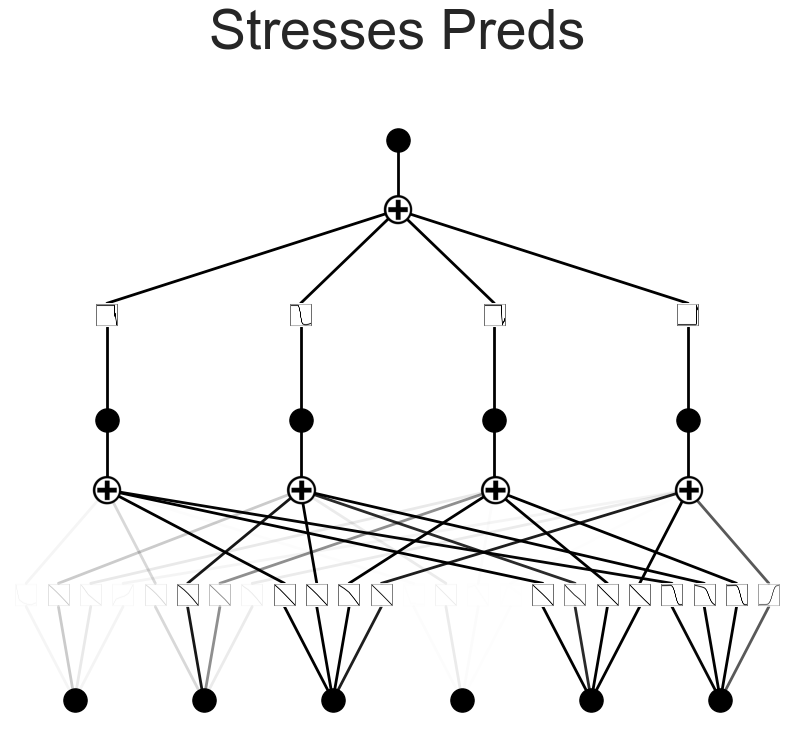

In [18]:
kan_model.final_model.plot(beta=50, scale=1, out_vars=["Stresses Preds"])


In [19]:
import moviepy.video.io.ImageSequenceClip

video_name = "video"
image_folder = "video_img"
fps = 10

fps = fps
files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith(".jpg"):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = [
    image_folder + "/" + str(train_index[index]) + ".jpg" for index in train_index
]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(video_name + ".mp4")


MoviePy - Building video video.mp4.
MoviePy - Writing video video.mp4



MoviePy - Done !
MoviePy - video ready video.mp4
